In [1]:
import os
import shutil
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
from random import sample
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Cuenta el número de imágenes que hay por cada categoría

imag_1_hoja = 0
imag_2_hojas = 0
imag_3_hojas = 0
imag_4_hojas = 0
imag_9_hojas = 0
dir1 = "C:/Users/ferga/Documents/Python/hojas/1_mod"
dir2 = "C:/Users/ferga/Documents/Python/hojas/2_mod"
dir3 = "C:/Users/ferga/Documents/Python/hojas/3_mod"
dir4 = "C:/Users/ferga/Documents/Python/hojas/4_mod"
dir5 = "C:/Users/ferga/Documents/Python/hojas/9+_mod"
for path in os.listdir(dir1):
    if os.path.isfile(os.path.join(dir1, path)):
        imag_1_hoja += 1
for path in os.listdir(dir2):
    if os.path.isfile(os.path.join(dir2, path)):
        imag_2_hojas += 1
for path in os.listdir(dir3):
    if os.path.isfile(os.path.join(dir3, path)):
        imag_3_hojas += 1
for path in os.listdir(dir4):
    if os.path.isfile(os.path.join(dir4, path)):
        imag_4_hojas += 1
for path in os.listdir(dir5):
    if os.path.isfile(os.path.join(dir5, path)):
        imag_9_hojas += 1
print('Imagenes de 1 hoja: '+ str(imag_1_hoja))
print('Imagenes de 2 hojas: '+ str(imag_2_hojas))
print('Imagenes de 3 hojas: '+ str(imag_3_hojas))
print('Imagenes de 4 hojas: '+ str(imag_4_hojas))
print('Imagenes de 9 hojas: '+ str(imag_9_hojas))
print('Total: ', imag_1_hoja+imag_2_hojas+imag_3_hojas+imag_4_hojas+imag_9_hojas)


Imagenes de 1 hoja: 473
Imagenes de 2 hojas: 466
Imagenes de 3 hojas: 466
Imagenes de 4 hojas: 501
Imagenes de 9 hojas: 455
Total:  2361


In [4]:
#Cuenta cuantas imágenes servirán para train, para validation y para test, en este caso se ha seguido el criterio 80%-10%-10% respectivamente.

n_imag_train_1 = round(imag_1_hoja*0.8)
n_imag_validation_1 = imag_1_hoja//10
n_imag_test_1 = imag_1_hoja-n_imag_train_1-n_imag_validation_1
print('1 hoja: Train=' + str(n_imag_train_1) + ' Validation=' + str(n_imag_validation_1) + ' Test=' + str(n_imag_test_1))
n_imag_train_2 = round(imag_2_hojas*0.8)
n_imag_validation_2 = imag_2_hojas//10
n_imag_test_2 = imag_2_hojas-n_imag_train_2-n_imag_validation_2
print('2 hojas: Train=' + str(n_imag_train_2) + ' Validation=' + str(n_imag_validation_2) + ' Test=' + str(n_imag_test_2))
n_imag_train_3 = round(imag_3_hojas*0.8)
n_imag_validation_3 = imag_3_hojas//10
n_imag_test_3 = imag_3_hojas-n_imag_train_3-n_imag_validation_3
print('3 hojas: Train=' + str(n_imag_train_3) + ' Validation=' + str(n_imag_validation_3) + ' Test=' + str(n_imag_test_3))
n_imag_train_4 = round(imag_4_hojas*0.8)
n_imag_validation_4 = imag_4_hojas//10
n_imag_test_4 = imag_4_hojas-n_imag_train_4-n_imag_validation_4
print('4 hojas: Train=' + str(n_imag_train_4) + ' Validation=' + str(n_imag_validation_4) + ' Test=' + str(n_imag_test_4))
n_imag_train_9 = round(imag_9_hojas*0.8)
n_imag_validation_9 = imag_9_hojas//10
n_imag_test_9 = imag_9_hojas-n_imag_train_9-n_imag_validation_9
print('9+ hojas: Train=' + str(n_imag_train_9) + ' Validation=' + str(n_imag_validation_9) + ' Test=' + str(n_imag_test_9))

1 hoja: Train=378 Validation=47 Test=48
2 hojas: Train=373 Validation=46 Test=47
3 hojas: Train=373 Validation=46 Test=47
4 hojas: Train=401 Validation=50 Test=50
9+ hojas: Train=364 Validation=45 Test=46


In [5]:
#Asignamos cada ruta a variables que luego serán necesarias.

base_dir = "C:/Users/ferga/Documents/Python/hojas"

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

## Directorio con las imagenes de train
# 1 hoja.
train_weed1_dir = os.path.join(train_dir, '1')
# 2 hojas.
train_weed2_dir = os.path.join(train_dir, '2')
# 3 hojas.
train_weed3_dir = os.path.join(train_dir, '3')
# 4 hojas.
train_weed4_dir = os.path.join(train_dir, '4')
# 9+ hojas.
train_weed9_dir = os.path.join(train_dir, '9+')

## Directorio con las imagenes de validation
# 1 hoja
validation_weed1_dir = os.path.join(validation_dir, '1')
# 2 hojas
validation_weed2_dir = os.path.join(validation_dir, '2')
# 3 hojas
validation_weed3_dir = os.path.join(validation_dir, '3')
# 4 hojas
validation_weed4_dir = os.path.join(validation_dir, '4')
# 9+ hojas
validation_weed9_dir = os.path.join(validation_dir, '9+')

## Directorio con las imagenes de test
# 1 hoja
test_weed1_dir = os.path.join(test_dir,'1')
# 2 hojas
test_weed2_dir = os.path.join(test_dir,'2')
# 3 hojas
test_weed3_dir = os.path.join(test_dir,'3')
# 4 hojas
test_weed4_dir = os.path.join(test_dir,'4')
# 9+ hojas
test_weed9_dir = os.path.join(test_dir,'9+')

In [6]:
# Ordena las imágenes de cada categoría en el directorio de train, validation y test.

# 1 hoja
contenido_1 = os.listdir(dir1)
contenido_1_random = sample(contenido_1, len(contenido_1))
for i in range(len(contenido_1_random)):
    if i < n_imag_train_1:
        shutil.copy(os.path.join(dir1, contenido_1_random[i]), train_weed1_dir)
    elif i >= n_imag_train_1 and i < n_imag_train_1+n_imag_validation_1:
        shutil.copy(os.path.join(dir1, contenido_1_random[i]), validation_weed1_dir)
    else:
        shutil.copy(os.path.join(dir1, contenido_1_random[i]), test_weed1_dir)
# 2 hojas
contenido_2 = os.listdir(dir2)
contenido_2_random = sample(contenido_2, len(contenido_2))
for i in range(len(contenido_2_random)):
    if i < n_imag_train_2:
        shutil.copy(os.path.join(dir2, contenido_2_random[i]), train_weed2_dir)
    elif i >= n_imag_train_2 and i < n_imag_train_2+n_imag_validation_2:
        shutil.copy(os.path.join(dir2, contenido_2_random[i]), validation_weed2_dir)
    else:
        shutil.copy(os.path.join(dir2, contenido_2_random[i]), test_weed2_dir)
# 3 hojas
contenido_3 = os.listdir(dir3)
contenido_3_random = sample(contenido_3, len(contenido_3))
for i in range(len(contenido_3_random)):
    if i < n_imag_train_3:
        shutil.copy(os.path.join(dir3, contenido_3_random[i]), train_weed3_dir)
    elif i >= n_imag_train_3 and i < n_imag_train_3+n_imag_validation_3:
        shutil.copy(os.path.join(dir3, contenido_3_random[i]), validation_weed3_dir)
    else:
        shutil.copy(os.path.join(dir3, contenido_3_random[i]), test_weed3_dir)
# 4 hojas
contenido_4 = os.listdir(dir4)
contenido_4_random = sample(contenido_4, len(contenido_4))
for i in range(len(contenido_4_random)):
    if i < n_imag_train_4:
        shutil.copy(os.path.join(dir4, contenido_4_random[i]), train_weed4_dir)
    elif i >= n_imag_train_4 and i < n_imag_train_4+n_imag_validation_4:
        shutil.copy(os.path.join(dir4, contenido_4_random[i]), validation_weed4_dir)
    else:
        shutil.copy(os.path.join(dir4, contenido_4_random[i]), test_weed4_dir)
# 9+ hojas
contenido_9 = os.listdir(dir5)
contenido_9_random = sample(contenido_9, len(contenido_9))
for i in range(len(contenido_9_random)):
    if i < n_imag_train_9:
        shutil.copy(os.path.join(dir5, contenido_9_random[i]), train_weed9_dir)
    elif i >= n_imag_train_9 and i < n_imag_train_9+n_imag_validation_9:
        shutil.copy(os.path.join(dir5, contenido_9_random[i]), validation_weed9_dir)
    else:
        shutil.copy(os.path.join(dir5, contenido_9_random[i]), test_weed9_dir)

In [7]:
# Pequeña comprobación de que las fotos están bien ordenadas

# Train
train_weed1_fnames = os.listdir( train_weed1_dir )
print(train_weed1_fnames[:5])
train_weed2_fnames = os.listdir( train_weed2_dir )
print(train_weed2_fnames[:5])
train_weed3_fnames = os.listdir( train_weed3_dir )
print(train_weed3_fnames[:5])
train_weed4_fnames = os.listdir( train_weed4_dir )
print(train_weed4_fnames[:5])
train_weed9_fnames = os.listdir( train_weed9_dir )
print(train_weed9_fnames[:5])

['0.png', '10.png', '100.png', '102.png', '106.png']
['1.png', '10.png', '102.png', '105.png', '107.png']
['10.png', '101.png', '105.png', '107.png', '108.png']
['1006.png', '1009.png', '1014.png', '1019.png', '102.png']
['100.png', '101.png', '106.png', '108.png', '110.png']


In [8]:
#Comprueba el numero de fotos que hay en cada directorio para verificar que se ha realizado el reparto correctamente

print('total training weed1 images :', len(os.listdir(train_weed1_dir ) ))
print('total training weed2 images :', len(os.listdir(train_weed2_dir ) ))
print('total training weed3 images :', len(os.listdir(train_weed3_dir ) ))
print('total training weed4 images :', len(os.listdir(train_weed4_dir ) ))
print('total training weed9 images :', len(os.listdir(train_weed9_dir ) ))

print('total validation weed1 images :', len(os.listdir( validation_weed1_dir ) ))
print('total validation weed2 images :', len(os.listdir( validation_weed2_dir ) ))
print('total validation weed3 images :', len(os.listdir( validation_weed3_dir ) ))
print('total validation weed4 images :', len(os.listdir( validation_weed4_dir ) ))
print('total validation weed9 images :', len(os.listdir( validation_weed9_dir ) ))

print('total test weed1 images :', len(os.listdir( test_weed1_dir ) ))
print('total test weed2 images :', len(os.listdir( test_weed2_dir ) ))
print('total test weed3 images :', len(os.listdir( test_weed3_dir ) ))
print('total test weed4 images :', len(os.listdir( test_weed4_dir ) ))
print('total test weed9 images :', len(os.listdir( test_weed9_dir ) ))

total training weed1 images : 378
total training weed2 images : 373
total training weed3 images : 373
total training weed4 images : 401
total training weed9 images : 364
total validation weed1 images : 47
total validation weed2 images : 46
total validation weed3 images : 46
total validation weed4 images : 50
total validation weed9 images : 45
total test weed1 images : 48
total test weed2 images : 47
total test weed3 images : 47
total test weed4 images : 50
total test weed9 images : 46


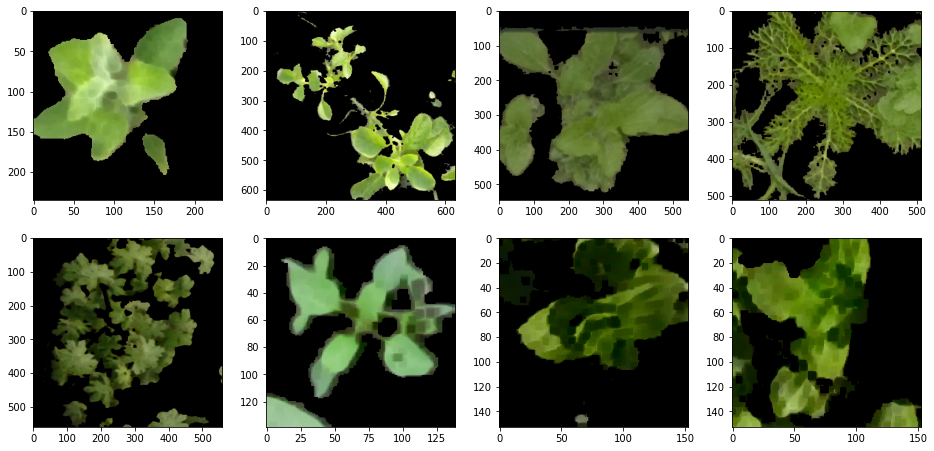

In [10]:
# Representa un ejemplo de las imágenes que se van a tomar para resolver el problema. En este caso se representarán las de dos hojas

# presentaremos images en una configuración de 4x4
nrows = 4
ncols = 4

pic_index = 0 # Índice para iterar sobre las imagenes

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_weed_pix = [os.path.join(train_weed9_dir, fname) 
                for fname in train_weed9_fnames[ pic_index-8:pic_index] 
               ]

for i, img_path in enumerate(next_weed_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  
plt.show()

In [18]:
#Creación de la CNN

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 256)      

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [21]:
train_datagen = ImageDataGenerator(
      rescale=1.0/255.,
      rotation_range=60,
      horizontal_flip=True,
      vertical_flip=True,
      brightness_range=[0.5,1.5],
      fill_mode='nearest'
      )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [22]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         shuffle=False,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 1889 images belonging to 5 classes.
Found 234 images belonging to 5 classes.
Found 238 images belonging to 5 classes.


In [23]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

94
11


In [24]:
history = model.fit(
    train_generator, 
    steps_per_epoch= steps_per_epoch,
    epochs=150,
    validation_data=validation_generator,
    validation_steps= validation_steps,
    verbose=1)

Epoch 1/150
94/94 [==============================] - 26s 204ms/step - loss: 1.5826 - accuracy: 0.2788 - val_loss: 1.5578 - val_accuracy: 0.3909
Epoch 2/150
94/94 [==============================] - 13s 137ms/step - loss: 1.4595 - accuracy: 0.3981 - val_loss: 1.3837 - val_accuracy: 0.4455
Epoch 3/150
94/94 [==============================] - 13s 142ms/step - loss: 1.3106 - accuracy: 0.4553 - val_loss: 1.3330 - val_accuracy: 0.3636
Epoch 4/150
94/94 [==============================] - 13s 142ms/step - loss: 1.2263 - accuracy: 0.5088 - val_loss: 1.2068 - val_accuracy: 0.5227
Epoch 5/150
94/94 [==============================] - 14s 146ms/step - loss: 1.1653 - accuracy: 0.5297 - val_loss: 1.1481 - val_accuracy: 0.5409
Epoch 6/150
94/94 [==============================] - 14s 147ms/step - loss: 1.1064 - accuracy: 0.5591 - val_loss: 1.1690 - val_accuracy: 0.5227
Epoch 7/150
94/94 [==============================] - 14s 148ms/step - loss: 1.0465 - accuracy: 0.5987 - val_loss: 0.9413 - val_accuracy:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

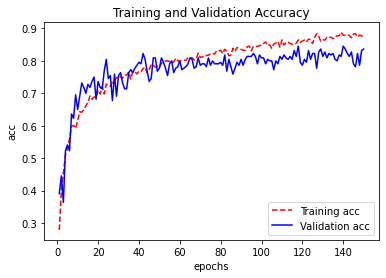

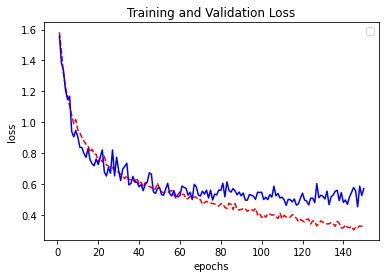

<Figure size 432x288 with 0 Axes>

In [25]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [26]:
test_lost, test_acc= model.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

12/12 [==============================] - 1s 121ms/step - loss: 0.5621 - accuracy: 0.7689
Test Accuracy: 0.7689075469970703


In [27]:
# Guardar el modelo
model.save('CH_V_5hojasmix_cv.h5')

In [12]:
# Cargar modelo
model = tf.keras.models.load_model('CH_V_5hojasmix_cv.h5')

Confusion Matrix


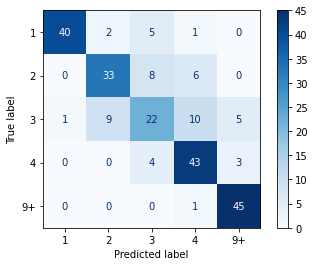

Classification Report
              precision    recall  f1-score   support

           1       0.98      0.83      0.90        48
           2       0.75      0.70      0.73        47
           3       0.56      0.47      0.51        47
           4       0.70      0.86      0.77        50
          9+       0.85      0.98      0.91        46

    accuracy                           0.77       238
   macro avg       0.77      0.77      0.76       238
weighted avg       0.77      0.77      0.76       238



In [29]:
# confusion matrix
Y_pred = model.predict(test_generator, len(test_dir) // (20+1))
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['1', '2','3','4','9+']
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))